<a href="https://colab.research.google.com/github/HoshimMardonov/Datasets/blob/main/graduate_admissions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

import math

We load dataFrame using the pandas library


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Rhtyme/ml_uz_book/main/practice_session/Multivariate_linear_regression_4_6/Admission_Predict.csv")

***Let's get acquainted with the database, that is, what columns there are, and what the data in them looks like, etc.***

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


The data set we use includes information about the probability of admission to the world's leading universities, based on the performance of applicants. Let's take a closer look at this dataset:

* **Serial no.** - sequence number of the row (no significance)
*   **Research** - Research experience or not (0 or 1)
*   **GRE Score **- the applicant's GRE (Graduate Record Examinations) score (max - 340)
*   **TOEFL Score** - the applicant's TOEFL English score (max - 120)
*   **University Rating**- rating of the university where the applicant wants to study (max - 5)
*   **SOP**- Evaluation of the applicant's statement of purpose (max - 5)
* **LOR**- strength of applicant recommendation (max - 5)
*   **CGPA**- average grade of the applicant in the previous institution of education (max - 10)
*   **Chance of Admit** - probability of admission to the university of the applicant's choice (range [0,1])

Now let's get acquainted with the technical aspects of the data set, that is, in what format, the number of rows, etc.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


As we can see, the dataset consists of 400 rows and each column is in different formats (int64 and float64). Let's fit this data set to mathematical operations, specifically the linear regression process. In this case, we first convert to a numpy array for ease of calculation, choosing float64 as the column format.

In [6]:
df = np.array(df, dtype = float)

In [7]:
df.shape

(400, 9)

We extract the columns from the data set for the learning process, and load them into the X variable as an array. In this case, we discard the unnecessary columns, in particular the Serial No column. Note that the last column, the Chance of Admit column, is not being loaded either, because we are loading this column into a separate variable as an array of targets.

In [37]:
X = df[:, 1:8]
X[:10]

array([[337.  , 118.  ,   4.  ,   4.5 ,   4.5 ,   9.65,   1.  ],
       [324.  , 107.  ,   4.  ,   4.  ,   4.5 ,   8.87,   1.  ],
       [316.  , 104.  ,   3.  ,   3.  ,   3.5 ,   8.  ,   1.  ],
       [322.  , 110.  ,   3.  ,   3.5 ,   2.5 ,   8.67,   1.  ],
       [314.  , 103.  ,   2.  ,   2.  ,   3.  ,   8.21,   0.  ],
       [330.  , 115.  ,   5.  ,   4.5 ,   3.  ,   9.34,   1.  ],
       [321.  , 109.  ,   3.  ,   3.  ,   4.  ,   8.2 ,   1.  ],
       [308.  , 101.  ,   2.  ,   3.  ,   4.  ,   7.9 ,   0.  ],
       [302.  , 102.  ,   1.  ,   2.  ,   1.5 ,   8.  ,   0.  ],
       [323.  , 108.  ,   3.  ,   3.5 ,   3.  ,   8.6 ,   0.  ]])

In [38]:
X.shape[1]

7

We extract targets from the data set, and load them into the Y variable.

In [14]:
Y = df[:,8:]
Y[:10]

array([[0.92],
       [0.76],
       [0.72],
       [0.8 ],
       [0.65],
       [0.9 ],
       [0.75],
       [0.68],
       [0.5 ],
       [0.45]])

As we saw above, the target array consists of numbers in the range [0,1]. Let's reduce them to [0,100] for convenience in the ledgers.

In [16]:
Y = Y * 100
Y[:10]

array([[92.],
       [76.],
       [72.],
       [80.],
       [65.],
       [90.],
       [75.],
       [68.],
       [50.],
       [45.]])

<h1>Refinement of input variables - standardization</h1>

> Let's use the standardization method for smoothing the input variables

To find the arithmetic mean and root mean square deviation in the above formula, we use the mean() and std() functions in the numpy library and create a feature_scaling function that expresses this formula.

In [39]:
def feature_scaling(X):
  avg_array = np.mean(X,0)
  std_array = np.std(X,0)
  return np.divide(X-avg_array, std_array)

In [40]:
X = feature_scaling(X)

In [41]:
X[:3]

array([[ 1.76210664,  1.74697064,  0.79882862,  1.09386422,  1.16732114,
         1.76481828,  0.90911166],
       [ 0.62765641, -0.06763531,  0.79882862,  0.59665321,  1.16732114,
         0.45515126,  0.90911166],
       [-0.07046681, -0.56252785, -0.07660001, -0.39776881,  0.05293342,
        -1.00563118,  0.90911166]])

For convenience in vertical calculations, let's add a vector whose value is to an array.

In [42]:
def add_bias(X):
  A_0 = np.ones((X.shape[0], 1))
  return np.hstack((A_0, X))

In [43]:
X = add_bias(X)

In [44]:
X[:5]

array([[ 1.        ,  1.76210664,  1.74697064,  0.79882862,  1.09386422,
         1.16732114,  1.76481828,  0.90911166],
       [ 1.        ,  0.62765641, -0.06763531,  0.79882862,  0.59665321,
         1.16732114,  0.45515126,  0.90911166],
       [ 1.        , -0.07046681, -0.56252785, -0.07660001, -0.39776881,
         0.05293342, -1.00563118,  0.90911166],
       [ 1.        ,  0.4531256 ,  0.42725722, -0.07660001,  0.0994422 ,
        -1.06145431,  0.11933921,  0.90911166],
       [ 1.        , -0.24499762, -0.72749202, -0.95202863, -1.39219083,
        -0.50426044, -0.65302852, -1.09997489]])

In [45]:
X.shape[1]

8

<h1>Split the data into training/test sets</h1>

Let's split the data set we have into training/test sets. In this case, the linear regression we create will learn from the training dataset and test its performance from the test dataset. We use an 80/20 ratio for the training/test dataset split, which means we split 80% of the dataset into the training dataset and 20% into the test dataset.

In [46]:
rows, _ = X.shape

In [47]:
rows

400

In [48]:
def split(X,Y):
  rows, _ = X.shape
  train_rows = round(rows * 0.8)
  test_rows = rows - train_rows
  return X[0:train_rows, :], X[train_rows:, :], Y[0:train_rows, :], Y[train_rows:, :]

In [49]:
X_train, X_test, Y_train, Y_test = split(X,Y)

In [51]:
print(f"X_train shape:{X_train.shape},\n"
      f"X_test shape:{X_test.shape}, \n"
      f"Y_train shape:{Y_train.shape}, \n"
      f"Y_test:{Y_test.shape}")

X_train shape:(320, 8),
X_test shape:(80, 8), 
Y_train shape:(320, 1), 
Y_test:(80, 1)


**Initialization of coefficients**
> We have n=7 because the data set has 7 columns (column 8 is a vector of 1's). So we have 8 coefficients, including the bias, and we can represent them in vectorized form in a 1-dimensional array. When initializing the coefficients, we use the rand function of the numpy library, which generates random numbers.

In [53]:
A = np.random.rand(X.shape[1], 1)

In [54]:
A

array([[0.87070056],
       [0.71449924],
       [0.22108789],
       [0.37888972],
       [0.10219905],
       [0.95032947],
       [0.92942434],
       [0.06957482]])

**Linear regression function**
> Now that we've defined the variables for the coefficients, let's define the basic function of the linear regression. Let's call this function f_x().

In [55]:
def f_x(X,A):
  return np.dot(X,A)

**Value function and Gradient descent**
> Recall the value function of linear regression:
 <br>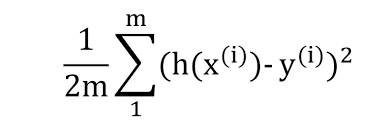

**Let's express this value function in a program:**

In [57]:
def cost(X, A, Y, m):
  diff = f_x(X,A) - Y
  diff_2 = np.power(diff, 2)
  sum_ = np.sum(diff_2)
  cost_ = sum_ / (2 * m)
  return cost_

And in gradient descent, we find the parameters that minimize the value function above. 

> Let's define a number of hyperparameters in the loop implementation above.

> We define the value of the number of steps as and store it in the epochs variable.

> Let's define the learning rate as and store it in the learning_rate variable.

In [58]:
epochs = 500
learning_rate = 0.05

We create a *gradient_descent* function that performs gradient descent and
we call it

In [59]:
def gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs):
  
  m_train = Y_train.shape[0]
  m_test = Y_test.shape[0]
  train_costs = []
  test_costs = []
  for k in range(epochs):
    fx = f_x(X_train, A)
    sum_diff = np.dot(X_train.T, np.subtract(fx, Y_train)) / m_train
    A = A - learning_rate * sum_diff
    cost_train = cost(X_train, A, Y_train, m_train)
    cost_test = cost(X_test, A, Y_test, m_test)
    if k % 10 == 0:
          print('epoch: %d, %f'% (k, cost_train))
          print('epoch: %d, %f'% (k, cost_test))
    train_costs.append(cost_train)
    test_costs.append(cost_test)
  return A, train_costs, test_costs

In [60]:
A, train_costs, test_costs = gradient_descent(X_train, Y_train, X_test, Y_test, A, learning_rate, epochs)

epoch: 0, 2353.246555
epoch: 0, 2345.031902
epoch: 10, 834.991123
epoch: 10, 984.776161
epoch: 20, 315.785355
epoch: 20, 402.350982
epoch: 30, 128.231285
epoch: 30, 175.697318
epoch: 40, 60.119380
epoch: 40, 86.863343
epoch: 50, 35.216213
epoch: 50, 50.827262
epoch: 60, 26.012037
epoch: 60, 35.481298
epoch: 70, 22.546539
epoch: 70, 28.542467
epoch: 80, 21.197968
epoch: 80, 25.189048
epoch: 90, 20.641794
epoch: 90, 23.457649
epoch: 100, 20.389657
epoch: 100, 22.509356
epoch: 110, 20.259279
epoch: 110, 21.964192
epoch: 120, 20.181276
epoch: 120, 21.638671
epoch: 130, 20.128365
epoch: 130, 21.438433
epoch: 140, 20.089215
epoch: 140, 21.312172
epoch: 150, 20.058702
epoch: 150, 21.230711
epoch: 160, 20.034222
epoch: 160, 21.176886
epoch: 170, 20.014263
epoch: 170, 21.140346
epoch: 180, 19.997837
epoch: 180, 21.114743
epoch: 190, 19.984238
epoch: 190, 21.096134
epoch: 200, 19.972931
epoch: 200, 21.082048
epoch: 210, 19.963501
epoch: 210, 21.070926
epoch: 220, 19.955615
epoch: 220, 21.061779


To visually see how much the cost function changes on the gradient descent, let's create a graph function plot_cost, which draws a graph using the matplotlib library.

In [61]:
def plot_costs(train_costs, test_costs, epochs):
  plt.xlabel("Epochs")
  plt.ylabel("Costs")
  plt.plot(epochs, train_costs, 'm', linewidth="1", color='r', label='error in exercise')
  plt.plot(epochs, test_costs, 'm', linewidth="1", color='g', label='error in test')
  plt.legend(loc="upper right")
  plt.show()

The plot_cost function accepts 3 array variables as parameters and these are:
> an array representing the result of the value function for the training set, the train_costs variable 

> an array representing the result of the value function for the test set, the test_costs variable

>array representing epochs, variable epochs

In [62]:
n_epochs = np.arange(1, epochs + 1)
n_train_costs = np.array(train_costs)
n_test_costs = np.array(test_costs)

**Calculate loss**

In [63]:
def calculate_loss(X,A,Y):
  m = Y.shape[0]
  fx = f_x(X, A)
  diff = fx - Y
  kv = np.power(diff, 2)
  sum_kv = np.sum(kv)
  kv_m = sum_kv / m
  for i in range(m):
    print('i:%d, fx:%f, Y: %f, diff: %f, kv: %f'%(i, fx[i], Y[i], diff[i], kv[i]))
  rmse = math.sqrt(kv_m)
  print('sum: %f, kv_m: %f, rmse: %f'%(sum_kv, kv_m, rmse))
  return rmse

In [64]:
print('root mean squared errrors: ', calculate_loss(X_test, A, Y_test))

i:0, fx:71.098063, Y: 75.000000, diff: -3.901937, kv: 15.225110
i:1, fx:72.227520, Y: 73.000000, diff: -0.772480, kv: 0.596726
i:2, fx:67.711170, Y: 72.000000, diff: -4.288830, kv: 18.394062
i:3, fx:59.710146, Y: 62.000000, diff: -2.289854, kv: 5.243434
i:4, fx:64.088114, Y: 67.000000, diff: -2.911886, kv: 8.479082
i:5, fx:84.697024, Y: 81.000000, diff: 3.697024, kv: 13.667984
i:6, fx:55.713596, Y: 63.000000, diff: -7.286404, kv: 53.091683
i:7, fx:52.342264, Y: 69.000000, diff: -16.657736, kv: 277.480155
i:8, fx:78.095554, Y: 80.000000, diff: -1.904446, kv: 3.626914
i:9, fx:50.125877, Y: 43.000000, diff: 7.125877, kv: 50.778120
i:10, fx:75.655665, Y: 80.000000, diff: -4.344335, kv: 18.873248
i:11, fx:60.887316, Y: 73.000000, diff: -12.112684, kv: 146.717117
i:12, fx:63.702263, Y: 75.000000, diff: -11.297737, kv: 127.638863
i:13, fx:73.052358, Y: 71.000000, diff: 2.052358, kv: 4.212172
i:14, fx:74.259093, Y: 73.000000, diff: 1.259093, kv: 1.585316
i:15, fx:84.660627, Y: 83.000000, diff:

We can also get acquainted with the values ​​of the optimal coefficients found by gradient descent:

In [66]:
A

array([[72.05627862],
       [ 1.97077535],
       [ 1.83395072],
       [ 0.99746877],
       [-0.54829018],
       [ 2.49947074],
       [ 6.84950509],
       [ 0.92860324]])

Let's graphically represent the change of the cost function at each step using the plot_cost function.